# Анализ причин оттока клиентов телекоммуникационной компании 

Смоделированные данные об оттоке клиентов телекоммуникационной компании были взяты с сайта https://www.mavenanalytics.io/data-playground. По легенде компания предоставляет телефонные и интернет-услуги 7043 клиентам в Калифорнии. Данные включают подробную информацию о демографии клиентов, местоположении, услугах и текущем статусе. 

Основные задачи: 

1. Проанализировать причины ухода клиентов компании. 
2. Сравнить профили клиентов, отказавшихся от услуг компании и продолжающих ими пользоваться. 
3. Сделать основные выводы по результатам анализа и определить ключевые направления работы для снижения уровня оттока клиентов.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(7,5)})

In [3]:
data = pd.read_csv("/Users/vladislavoveckin/Desktop/data analysis/telecom_customer_churn/Telecom+Customer+Churn/telecom_customer_churn.csv")

In [4]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
data.iloc[0]

Customer ID                            0002-ORFBO
Gender                                     Female
Age                                            37
Married                                       Yes
Number of Dependents                            0
City                                 Frazier Park
Zip Code                                    93225
Latitude                                34.827662
Longitude                             -118.999073
Number of Referrals                             2
Tenure in Months                                9
Offer                                        None
Phone Service                                 Yes
Avg Monthly Long Distance Charges           42.39
Multiple Lines                                 No
Internet Service                              Yes
Internet Type                               Cable
Avg Monthly GB Download                      16.0
Online Security                                No
Online Backup                                 Yes


In [19]:
data.columns = data.columns.str.replace(" ", "_")

In [7]:
data.shape

(7043, 38)

In [8]:
features_description = pd.read_csv("/Users/vladislavoveckin/Desktop/data analysis/telecom_customer_churn/Telecom+Customer+Churn/telecom_data_dictionary.csv", encoding="cp1252")

In [9]:
pd.options.display.max_colwidth = 150

In [10]:
features_description.drop(columns = "Table")

,Field,Description
0,CustomerID,A unique ID that identifies each customer
1,Gender,"The customer’s gender: Male, Female"
2,Age,"The customer’s current age, in years, at the time the fiscal quarter ended (Q2 2022)"
3,Married,"Indicates if the customer is married: Yes, No"
4,Number of Dependents,"Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)"
5,City,The city of the customer’s primary residence in California
6,Zip Code,The zip code of the customer’s primary residence
7,Latitude,The latitude of the customer’s primary residence
8,Longitude,The longitude of the customer’s primary residence
9,Number of Referrals,Indicates the number of times the customer has referred a friend or family member to this company to date


In [11]:
data.Age.mean()

46.50972596904728

Средний возраст клиентов компании составляет 46.5 лет.

In [12]:
data.Married.value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Married, dtype: float64

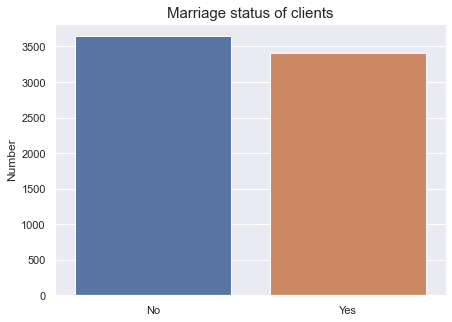

In [50]:
sns.barplot(x = data.Married.value_counts().index, y = data.Married.value_counts().values)
plt.title("Marriage status of clients", fontsize=15)
plt.ylabel("Number", fontsize=12)
plt.show()

С точки зрения семейного статуса, половина клиентов компании состоят в браке. 

In [12]:
data.City.value_counts().head(10)

Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Escondido         51
Stockton          44
Name: City, dtype: int64

Большинство клиентов, пользующиеся услугами, проживают в таких крупных городах как Лос-Анджелес, Сан-Диего, Сан-Хосе, Сакраменто и Сан-Франциско.

In [28]:
data[data["Customer_Status"] == "Joined"].Tenure_in_Months.value_counts().sum()

454

За последние три месяца количество новых клиентов телекоммуникационной компании составило 454 человека. 

In [13]:
data.Customer_Status.value_counts(normalize=True)

Stayed     0.670169
Churned    0.265370
Joined     0.064461
Name: Customer_Status, dtype: float64

Более 25 процентов клиентов в определенный момент отказались от услуг телекоммуникационной компаниии. 

In [14]:
data.Churn_Reason.value_counts().head(10)

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Name: Churn_Reason, dtype: int64

Наиболее распространенными причинами отказов от услуг компании являются причины, связанные с тем, что у конкурента лучше устройства, либо же конкурент предлагает более подходящее предложение. В целом, причины, связанные с конкурентами составляют 4 из 6 первых наиболее распространенных среди случаев отказа от пользования услугами. Кроме того, важными причинами отказов стали отношение службы поддержки и отношение провайдера услуг. 

In [15]:
data[data["Customer_Status"] == "Churned"].Tenure_in_Months.value_counts().head(10)

1     380
2     123
3      94
4      83
5      64
7      51
9      46
10     45
8      42
6      40
Name: Tenure_in_Months, dtype: int64

Чаще всего клиенты отказываются от услуг после 1-2 месяцев пользования услугами.

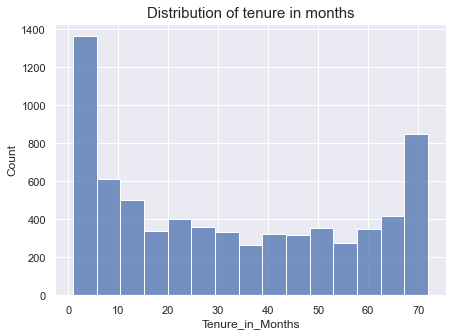

In [51]:
sns.histplot(data.Tenure_in_Months)
plt.title("Distribution of tenure in months", fontsize=15)
plt.show()

Из распределения количества месяцев, в течение которых клиенты пользовались услугами компании, следует, что большое количество клиентов отказываются от продолжения пользования услугами в первые несколько месяцев после начала взаимодействия с компанией. Однако стоит отметить, что количество клиентов, которые пользуются услугами на протяженни очень долгого времени, так же велико. Возможно, это те клиенты, которые начали пользоваться услугами в момент появления компании на рынке и продолжают пользоваться до сих пор. 

###  Сравнение профилей клиентов разных статусов

Необхоимо понять, какими характеристиками различаются люди, отказавшиеся от услут телекоммуникационной компании и оставшиеся ее клиентами.

In [17]:
data.groupby("Customer_Status").Age.mean()

Customer_Status
Churned    49.735688
Joined     42.870044
Stayed     45.582415
Name: Age, dtype: float64

Как видно, возраст тех клиентов, которые отказываются от услуг компании, в среднем выше, чем тех, кто остается с компанией.

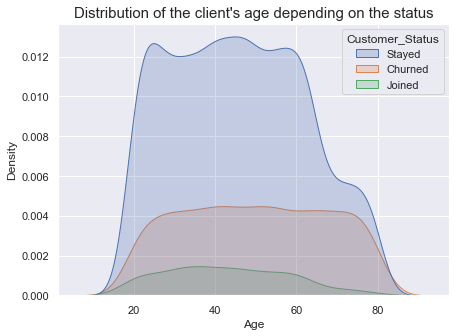

In [52]:
sns.kdeplot(data = data, x = "Age", hue = "Customer_Status", fill = True)
plt.title("Distribution of the client's age depending on the status", fontsize=15)
plt.show()

Однако из графика распределений возраста клиентов в зависимости от их статуса следует, что возраст клиентов, отказавшихся от услуг компании, распределен равномерно. Можно предположить, что клиенты пожилого возраста в целом в меньшей степени нуждаются в услугах телекоммуникационной компании, поэтому реже продолжают пользоваться ее услугами. 

In [15]:
data.groupby("Customer_Status").Married.value_counts(normalize=True)

Customer_Status  Married
Churned          No         0.642055
                 Yes        0.357945
Joined           No         0.814978
                 Yes        0.185022
Stayed           Yes        0.561229
                 No         0.438771
Name: Married, dtype: float64

Люди, которые не состоят в браке, гораздо чаще отказываются от пользования услугами компании. 

In [12]:
data.groupby("Customer_Status").Number_of_Referrals.mean()

Customer_Status
Churned    0.521134
Joined     0.949339
Stayed     2.614831
Name: Number_of_Referrals, dtype: float64

Клиенты, которые остаются с компанией, чаще рекомендуют ее услуги другим людям. 

In [23]:
data[data.Customer_Status == "Stayed"].Number_of_Referrals.value_counts(normalize=True)

0     0.466737
1     0.119492
7     0.050212
5     0.049576
9     0.047034
3     0.045551
10    0.045551
4     0.045551
6     0.043644
8     0.043220
2     0.043008
11    0.000424
Name: Number_of_Referrals, dtype: float64

Более 50 процентов оставшихся клиентов рекомендуют компанию как минимум одному человеку. Можно предположить, что этим человеком оказывается супруг(-а) клиента. 

In [31]:
data.groupby("Customer_Status").Internet_Service.value_counts(normalize=True)

Customer_Status  Internet_Service
Churned          Yes                 0.939540
                 No                  0.060460
Joined           Yes                 0.599119
                 No                  0.400881
Stayed           Yes                 0.739195
                 No                  0.260805
Name: Internet_Service, dtype: float64

Подавляющее большинство ушедших клиентов были подписаны на дополнительную услугу, обеспечивающую доступ в интернет. При этом, из тех клиентов, которые остаются с компанией, интернетом пользуются менее 75 процентов. Возможно, условия или качество оказания услуг, связанных с обеспечением доступа в интернет, далеко не всегда соответствуют потребностям и ожиданиям клиентов.

In [32]:
data.groupby("Customer_Status").Online_Security.value_counts(normalize=True)

Customer_Status  Online_Security
Churned          No                 0.832005
                 Yes                0.167995
Joined           No                 0.830882
                 Yes                0.169118
Stayed           No                 0.519060
                 Yes                0.480940
Name: Online_Security, dtype: float64

In [48]:
data.groupby("Customer_Status").Device_Protection_Plan.value_counts(normalize=True)

Customer_Status  Device_Protection_Plan
Churned          No                        0.689636
                 Yes                       0.310364
Joined           No                        0.882353
                 Yes                       0.117647
Stayed           Yes                       0.528805
                 No                        0.471195
Name: Device_Protection_Plan, dtype: float64

Клиенты, которые дольше взаимодействуют с компанией, чаще подписываются на различные услуги, связанные с безопасностью и защитой. Однако, скорее, это связано с фактом их долгого опыта взаимодействия с компанией: такие клиенты рано или поздно задумываются над подключением таких дополнительных услуг, о которых не думают в первую очередь в самом начале пути взаимодействия с телекоммуникационной компанией.

In [109]:
data.groupby("Customer_Status").Monthly_Charge.mean()

Customer_Status
Churned    73.347592
Joined     42.775991
Stayed     61.737415
Name: Monthly_Charge, dtype: float64

В среднем клиенты, которые прекратили пользоваться услугами компании, в момент своего взаимодействия с ней выбирали более дорогие тарифы.

In [25]:
data["Avg_revenue"] = data.Total_Revenue / data.Tenure_in_Months

In [47]:
data.groupby("Customer_Status").Avg_revenue.mean()

Customer_Status
Churned    98.330990
Joined     67.404692
Stayed     86.069473
Name: Avg_revenue, dtype: float64

В среднем каждый ушедший клиент приносил больше прибыли в месяц по сравнению с постоянными клиентами. Однако, возможно, причина ухода в некоторых случаях состояла именно в более цене тарифа с учетом необходимых клиенту сервисов по сравнению с конкурентами.

In [54]:
data.groupby("Customer_Status").Offer.value_counts()

Customer_Status  Offer  
Churned          None       1051
                 Offer E     426
                 Offer D     161
                 Offer B     101
                 Offer C      95
                 Offer A      35
Joined           None        279
                 Offer E     175
Stayed           None       2547
                 Offer B     723
                 Offer A     485
                 Offer D     441
                 Offer C     320
                 Offer E     204
Name: Offer, dtype: int64

В данных также представлена информация о последнем маркетинговом предложении, которое принял клиент. Можно отметить, что клиенты, которые отказались от пользования услугами компании, принимали предложение "Е" чаще, чем все остальные. При этом для клиентов, которые продолжили их взаимодействие с компанием, такое предложение оказалось наименее популярным. Можно предположить, что возможный негативный опыт клиентов от пользования предложением "Е" повлиял на их дальнейшее решение об отказе от услуг компании. Стоит пересмотреть содержание маркетинговых предложений и отказаться от наименее эффективных.

### Выводы 

1. Из тех клиентов, которые в определенный момент отказываются от услуг телекоммуникационной компании, многие принимают подобное решение в первые два месяца взаимодействия с компанией. Необходимо повысить качество взаимодействия с клиентом на начальном этапе взаимодействия с ним.

2. Большое количество причин ухода клиентов связано с конкурентами (у конкурента лучше устройства, конкурент предлагает более подходящее предложение, у конкурента более высокая скорость загрузки данных). Необходимо проанализировать предложения конкурентов и разработать собственное новое предложение, обладающее преимуществами на фоне предложений остальных компаний. В процессе анализа сделан вывод о низком качестве предоставления интернет услуг, которое может играть важную роль во многих случаях отказа от услуг компании: большинство клиентов, принявших решение прекратить пользование услугами, были подписаны на дополнительную услугу, обеспечивающую доступ в интернет, в то время как среди оставшихся клиентов доля людей, пользующихся такой услугой оказалась ниже. 

3. Были выявлены проблемы с качеством взаимодействия с клиентом. Некоторые ушедшие клиенты были неудовлетворены отношением провайдера и службы поддержки к клиентам. В первые месяцы взаимодействия с компанией у клиентов может возникать большое количество вопросов, которые необходимо вовремя и качественно решать. Стоит разработать (усовершенствовать) систему контроля за действиями специалистов службы поддержки в процессе общения с клиентами.

4. Оставшиеся с компанией клиенты в более 50 процентов случаев рекомендуют компанию как минимум одному человеку (возможно, часто этим человеком оказывается супруг(-а) клиента). Стоит подумать над предложением дополнительных преимуществ тем, кто рекомендует компанию своим близким или знакомыми. 

5. Ушедшие клиенты выбирали более дорогие тарифы. В среднем отдельный ушедший клиент приносил больше прибыли в месяц, чем постоянный клиент. Выходит, что из компании уходят клиенты, которые готовы платить, но при условии, что оказываемые услуги будут соответствовать их потребностям и ожиданиям. Возвращаемся к пункту 2 и 3, которые определяют основные существующие проблемы, решение которых может способствовать улучшению возможностей удержания клиентов на раннем этапе их взаимодействия с компанией.